<a href="https://colab.research.google.com/github/dhrisandamedhi/Retail_store/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail_store



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [121]:
# Import Libraries
# importing all libraries required in the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
import missingno as msno

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [123]:
# Load Dataset
store_test= pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/store.csv')
store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')

<ipython-input-123-475fb60ce062>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')


##analyze Rossmann Store dataset

### Dataset First View

In [124]:
# Dataset First Look
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [125]:
store_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


### Dataset Rows & Columns count

In [126]:
# Dataset Rows & Columns count
store_train.shape

(1017209, 9)

### Dataset Information

In [127]:
# Dataset Info
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [128]:
# Dataset Duplicate Value Count
store_train.duplicated().sum()


0

#### Missing Values/Null Values

In [129]:
# Missing Values/Null Values Count
store_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<Axes: >

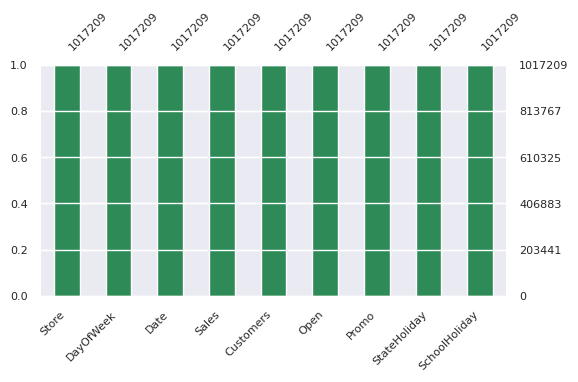

In [130]:
# Visualizing the missing values
msno.bar(store_train, figsize=(6,3), fontsize=8, color="seagreen")


### What did you know about your dataset?

Answer Here



## ***2. Understanding Your Variables***

In [131]:
# Dataset Columns
# store_train.columns()

In [132]:
# Dataset Describe
store_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description 

Answer Here



### Check Unique Values for each variable.

In [133]:
# Check Unique Values for each variable.

In [134]:
store_train.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [135]:
store_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6])

In [136]:
store_train.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [137]:
store_train.Sales.unique()

array([ 5263,  6064,  8314, ...,   660, 17815, 23303])

In [138]:
store_train.Customers.unique()

array([ 555,  625,  821, ..., 3900,   36, 4065])

In [139]:
store_train.Open.unique()

array([1, 0])

In [140]:
store_train.Promo.unique()

array([1, 0])

In [141]:
store_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [142]:
store_train.SchoolHoliday.unique()

array([1, 0])

##Convert some Date columns int to datetime

In [143]:
#now convert 
store_train['Date'] = pd.to_datetime(store_train['Date'])


In [144]:
store_train['SchoolHoliday']=store_train['SchoolHoliday'].apply(int)

###extract date


In [145]:
store_train['Year'] = store_train['Date'].apply(lambda x: x.year)

In [146]:
store_train['Month'] = store_train['Date'].apply(lambda x: x.month)

In [147]:
store_train['Day'] = store_train['Date'].apply(lambda x: x.day)

In [148]:
store_train['Weekof year'] = store_train['Date'].apply(lambda x: x.weekofyear)

In [149]:
store_train['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [150]:
store_train['Date'].max()

Timestamp('2015-07-31 00:00:00')

In [151]:
store_train['Date'].value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

##Analyze the Store dataset

###Dataset First View

In [152]:
# Dataset First Look
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [153]:
store_test.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


###Dataset Rows & Columns count

In [154]:
#rows and columns count
store_test.shape

(1115, 10)

###Dataset Information

In [155]:
# Dataset Info
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Duplicate Values

In [156]:
# Dataset Duplicate Value Count
store_test.duplicated().sum()

0

###Missing Values/Null Values

In [157]:
# Missing Values/Null Values Count
store_test.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

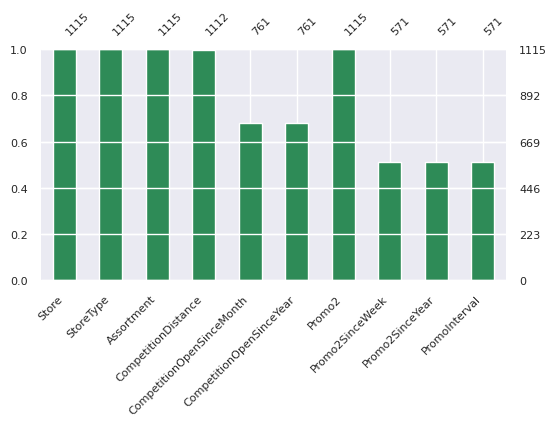

In [158]:
# Visualizing the missing values
msno.bar(store_test, figsize=(6,3), fontsize=8, color="seagreen")

###What did you know about your dataset?

Answer Here:

Data set has 1115 rows and 10 columns.

Almost 6 columns have null value.

Dataset has 5 float type columns, 2 object types columns and  3 object types columns.

Need to convert some float to int for accurat observation.

4 columns  of the dataset which hasn't any null values.


###Understanding Your Variables

In [159]:
# Dataset Columns
# store_test.columns()

In [160]:
# Dataset Describe
store_test.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


###Variables Description

Answer Here

Store- Index value 

Store- Store type is assign here .Here 3 types of unique value i.e. a,b,c,d

Assortment- 3 unique value a,c,b and nan value is 0.

CompetitionDistance: Here distance are define. It has some nall  values.

CompetitionOpenSinceMonth: here months are define ,but nall value is shown.It is float value so need to convert float to date.

CompetitionOpenSinceYear: number of  competition year . but it has some null value and need to remove ' .' from this column.it need to convert float to date.

Promo2:it has two binary  value 1 and 0. and has 1115 rows which means no nall value present in this column.

Promo2SinceWeek: No of promo week,it has null value. It need to covert float to int value.

Promo2SinceYear:Number of promo year , it has null value and nned to convert float to int.

PromoInterval:It has some group of month .it has some null value.

###Check Unique Values for each variable.

In [161]:
#Check Unique Values for each variable.
store_test.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [162]:
store_test.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [163]:
store_test.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [164]:
store_test.CompetitionDistance.unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [165]:
store_test.CompetitionOpenSinceMonth .unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [166]:
store_test.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [167]:
store_test.Promo2.unique()

array([0, 1])

In [168]:
store_test.Promo2SinceWeek  .unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [169]:
store_test.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [170]:
store_test.PromoInterval  .unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [171]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##Cleaning

In [177]:
#replace 0 with nan
store_test=store_test.fillna(0)

###Convert some float to int

In [178]:
store_test['CompetitionOpenSinceMonth']=store_test['CompetitionOpenSinceMonth'].apply(int)

In [182]:
store_test['CompetitionOpenSinceMonth'] = pd.to_datetime(store_test['CompetitionOpenSinceMonth']).dt.month

In [185]:
store_test['CompetitionOpenSinceYear']=store_test['CompetitionOpenSinceYear'].apply(int)
store_test['CompetitionOpenSinceYear'] = pd.to_datetime(store_test['CompetitionOpenSinceYear']).dt.year

In [189]:
store_test['Promo2SinceWeek']=store_test['Promo2SinceWeek'].apply(int)
# store_test['Promo2SinceWeek '] = pd.to_datetime(store_test['Promo2SinceWeek ']).dt.day

In [190]:
store_test['Promo2SinceYear']=store_test['Promo2SinceYear'].apply(int)
store_test['Promo2SinceYear'] = pd.to_datetime(store_test['Promo2SinceYear']).dt.year

## 4.Data Wrangling

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#check outliers
store_train.describe()

In [ ]:
#Check outlier 
columns = ['Store',	'CompetitionDistance',	'CompetitionOpenSinceMonth'	,'CompetitionOpenSinceYear'	,'Promo2','Promo2SinceWeek','Promo2SinceYear']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(store_train[column])
  plt.tight_layout()

->see some outliers in compitiors distance

In [ ]:
store_train=store_train[store_train['CompetitionDistance']<5000].reset_index(drop=True)

In [ ]:
store_train.describe()

->now remove all outlier

### What all manipulations have you done and insights you found?

Answer Here.



 Remove all null value with 0

Check for duplicate value

covert some float value to int 

check outlier ,and find compititionDisatnce has outlier and remove outlier

our data is now clean












## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
store_train.head()

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(9,8))
sns.countplot(x='CompetitionOpenSinceMonth', hue = 'StoreType', data= store_train)
plt.title('Months of Arrival')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

See the relation b/w competition open science year with store type

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
store_train.CompetitionDistance.value_counts().iloc[:10].plot(kind = 'barh')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
store_train.head()

In [ ]:
store_train['Date']=store_train[store_train['CompetitionOpenSinceMonth']+'-'+ store_train['CompetitionOpenSinceYear']]

In [ ]:
# Chart - 3 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrices  import r2_score
from sklear.prepocessiong import OneHotEncoder

In [ ]:
x=store_train
y=store_test

In [ ]:
 from sklearn.model_selection import train_test_split  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***